<a href="https://colab.research.google.com/github/tilakparth/Data_Science/blob/master/neural%20network/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
img_ = cv2.imread("../me.jpg")
img_ = cv2.cvtColor(img_,2)
img_ = cv2.resize(img_,(400,400))
img_gray = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)

In [4]:
def drawing(img,title ="title"):
    plt.style.use("seaborn")
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title(title+str(img.shape))
    plt.show()

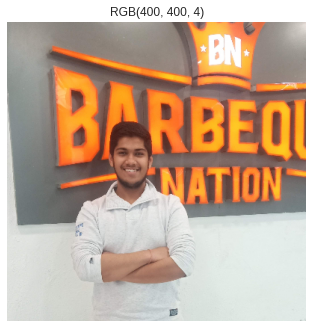

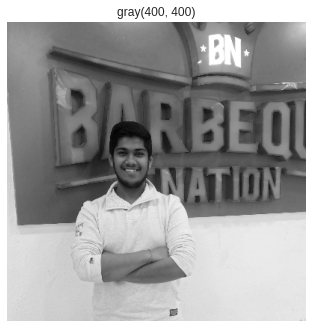

In [5]:
drawing(img_,"RGB")
drawing(img_gray,"gray")

In [6]:
## Hardcoded filter

def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    F = img_filter.shape[0] #3
    new_img = np.zeros((W-F+1,H-F+1))
    for row in range(W-F+1):
        for col in range(H-F+1):      ## First two loop iterating on image
            for i in range(F):
                for j in range(F):    ## Last two loop for iterating over filter
                    new_img[row][col] += (img[row+i][col+j]*img_filter[i][j])
                if new_img[row][col]>255:
                    new_img[row][col] = 255
                if new_img[row][col]<0:
                    new_img[row][col] = 0
    return new_img ##Activation map

In [7]:
blur_filter = np.ones((3,3))/9.0

In [8]:
print(blur_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [9]:
output = convolution(img_gray,blur_filter)

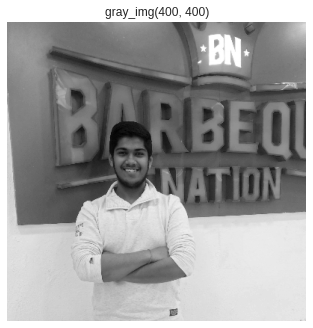

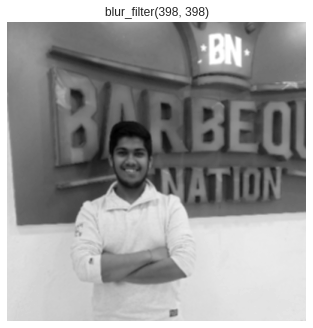

In [10]:
drawing(img_gray,"gray_img")
drawing(output,"blur_filter")

In [11]:
edge_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
output1 = convolution(img_gray,edge_filter)

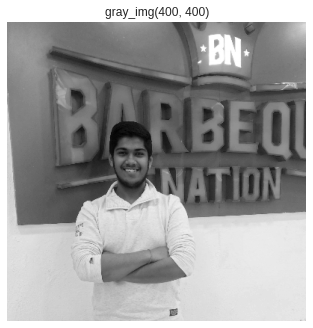

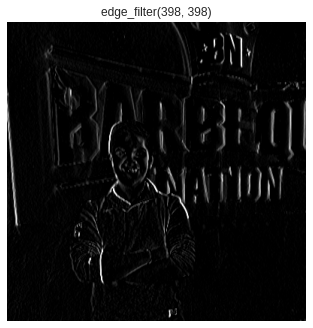

In [12]:
drawing(img_gray,"gray_img")
drawing(output1,"edge_filter")

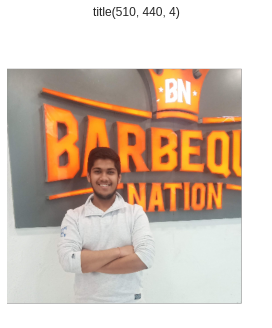

In [13]:
# padding 
pad_img = np.pad(img_,((80,30),(0,40),(0,0)),"constant",constant_values =0)
drawing(pad_img)

#### Implement Pooling Operation

In [14]:
X = np.array([[1,0,2,3],
            [4,6,6,8],
            [3,1,1,0],
            [1,2,2,4]])

In [15]:
def pooling(X,mode = "max"):
    stride = 2
    f = 2
    H,W = X.shape
    HO = int((H-f)/stride)+1
    WO = int((W-f)/stride)+1
    output = np.zeros((HO,WO))
#     print(output.shape)
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start : r_end,c_start:c_end]
#             print(X_slice)
#             print(np.max(X_slice))
            if mode == "max":
                output[r][c] = np.max(X_slice)
            else :
                output[r][c] = np.mean(X_slice)
    return output 

In [16]:
##Max pooling
pooling(X,"max")

array([[6., 8.],
       [3., 4.]])

In [17]:
##Avg ppoling
pooling(X,"avg")

array([[2.75, 4.75],
       [1.75, 1.75]])

# CNN Fashion Training 

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

### Data Prepration 

In [2]:
from keras.datasets import fashion_mnist

In [3]:
((X_train,Y_train),(X_test,Y_test)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# X_train = X_train[:10000]
# Y_train = Y_train[:10000]

In [6]:
X_train = X_train/255.0

In [7]:
X_train = X_train.reshape((-1,28,28,1))

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
np.unique(Y_train,return_counts=True)  ##Well balanced data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [10]:
Y_train = np_utils.to_categorical(Y_train)

In [11]:
Y_train.shape  ## Converted to one_hot matrix

(60000, 10)

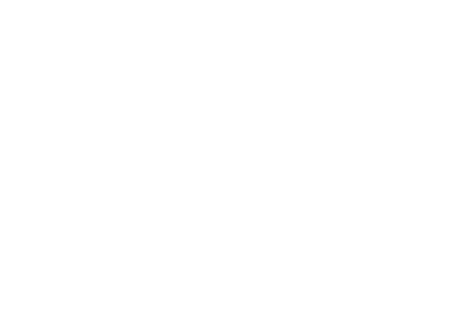

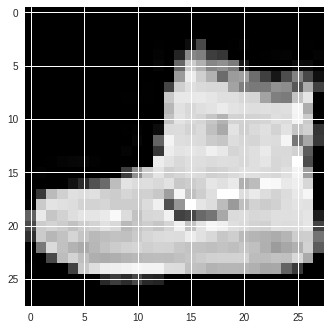

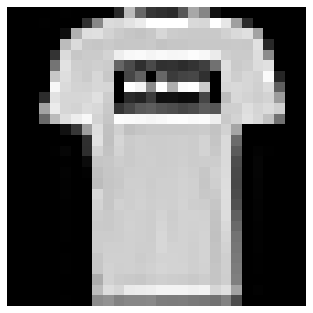

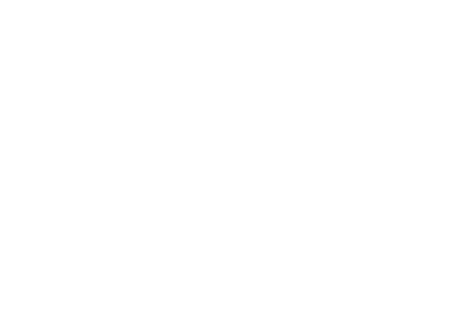

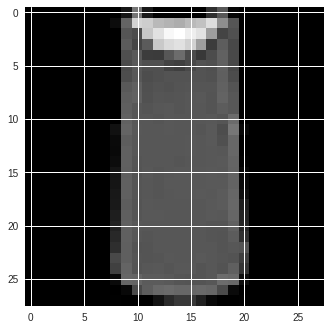

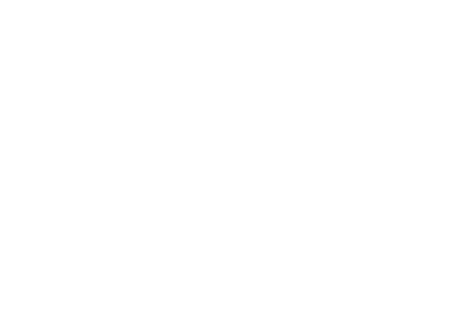

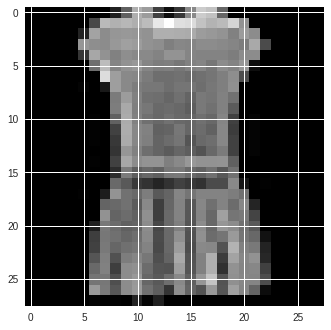

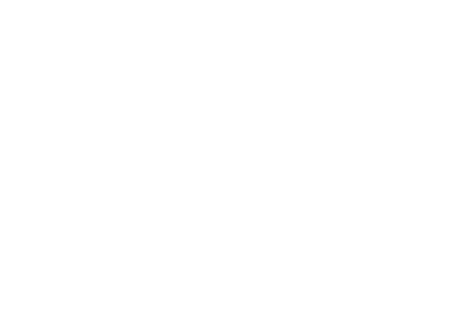

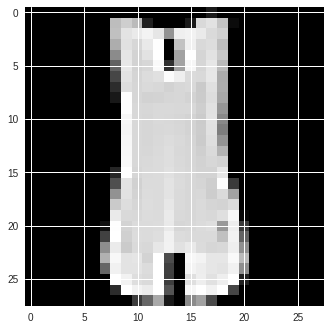

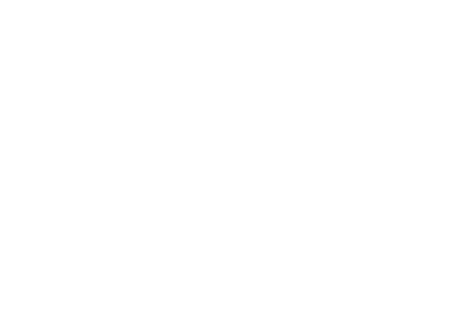

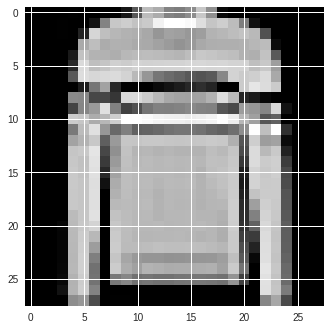

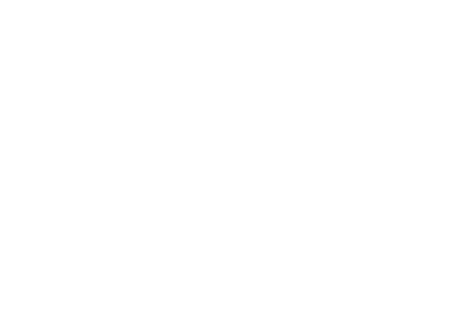

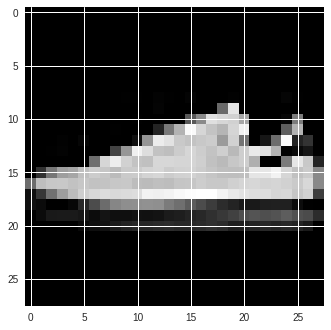

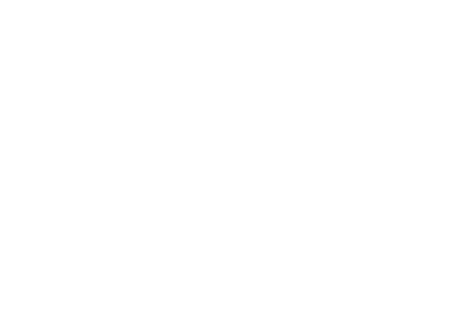

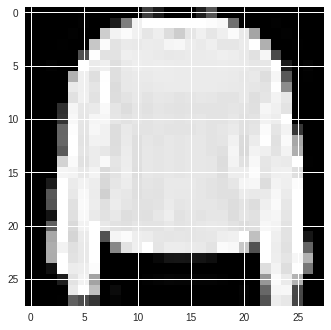

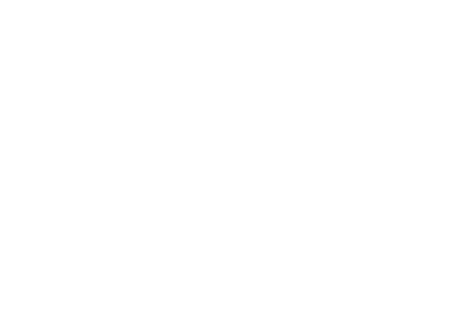

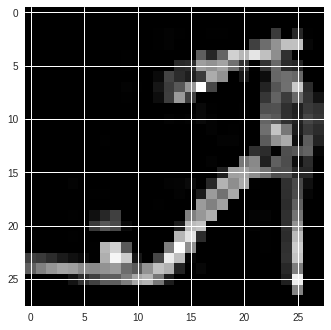

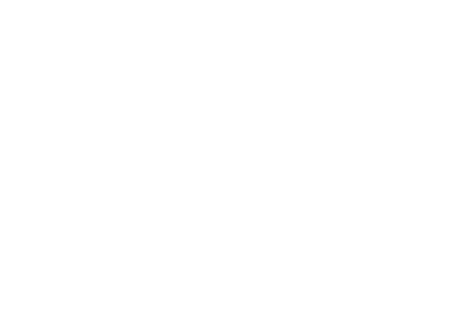

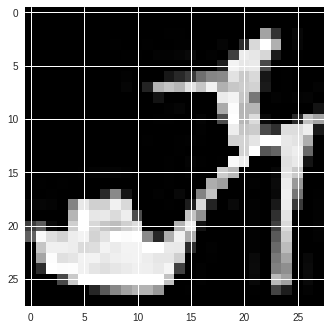

In [14]:
for i in range(10):
  plt.style.use("seaborn")
  plt.axis("off")
  plt.figure(i)
  plt.imshow(X_train[i].reshape(28,28),cmap="gray")
  plt.show()

## CNN Model

In [15]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation="relu"))
model.add(Convolution2D(8,(5,5),activation="relu",))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [16]:
model.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/20
188/188 [==============================] - 162s 859ms/step - loss: 0.7856 - accuracy: 0.7146 - val_loss: 0.5379 - val_accuracy: 0.8083
Epoch 2/20
188/188 [==============================] - 161s 859ms/step - loss: 0.4519 - accuracy: 0.8407 - val_loss: 0.4176 - val_accuracy: 0.8587
Epoch 3/20
188/188 [==============================] - 161s 856ms/step - loss: 0.3798 - accuracy: 0.8669 - val_loss: 0.3857 - val_accuracy: 0.8690
Epoch 4/20
188/188 [==============================] - 161s 854ms/step - loss: 0.3395 - accuracy: 0.8799 - val_loss: 0.3521 - val_accuracy: 0.8791
Epoch 5/20
188/188 [==============================] - 160s 852ms/step - loss: 0.3140 - accuracy: 0.8877 - val_loss: 0.3276 - val_accuracy: 0.8893
Epoch 6/20
188/188 [==============================] - 160s 853ms/step - loss: 0.2997 - accuracy: 0.8936 - val_loss: 0.3254 - val_accuracy: 0.8889
Epoch 7/20
188/188 [==============================] - 160s 853ms/step - loss: 0.2834 - accuracy: 0.8992 - val_loss: 0.3211 -

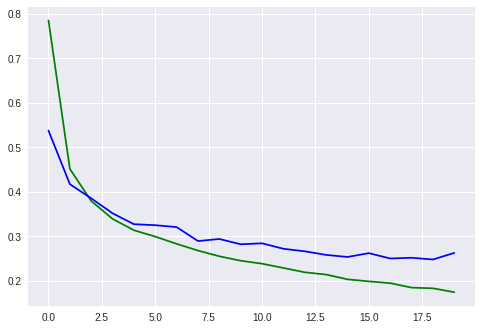

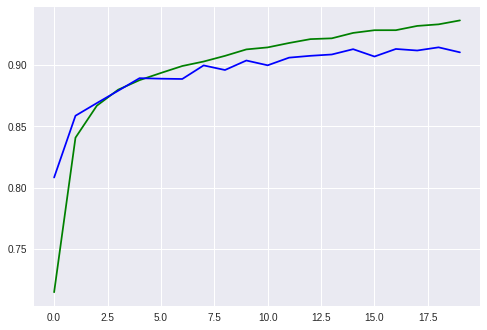

In [18]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()
plt.plot(hist.history['accuracy'],'g')
plt.plot(hist.history['val_accuracy'],'b')
plt.show()